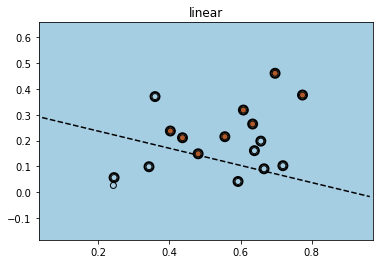

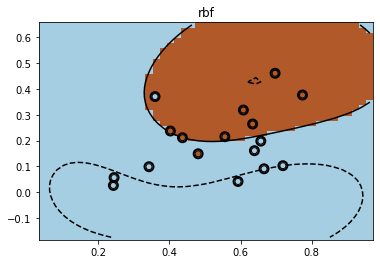

In [1]:
data_file_watermelon_3a = "watermelon_3a.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(data_file_watermelon_3a, header=None, )
df.columns = ['id', 'density', 'sugar_content', 'label']
df.set_index(['id'])
X = df[['density', 'sugar_content']].values
y = df['label'].values


from sklearn import svm 
#from libsvm.python.svmutil import *

for fig_num, kernel in enumerate(('linear', 'rbf')): 
    svc = svm.SVC(C=0.5, kernel=kernel)
    svc.fit(X, y)
    
    X_test = [[0.719,0.103]]
    #补充预测代码
    y_pred = svc.predict(X_test)
    #补充得到支持向量代码
    sv=svc.support_vectors_
    ##### draw decision zone
    plt.figure(fig_num)
    plt.clf()
    
    # plot point and mark out support vectors
    plt.scatter( X[:,0],  X[:,1], edgecolors='k', c=y, cmap=plt.cm.Paired,  zorder=10)
    plt.scatter(sv[:,0], sv[:,1], edgecolors='k', facecolors='none', s=80, linewidths=2, zorder=10)
    # plot the decision boundary and decision zone into a color plot
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()]) 
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z>0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.9, 0, .9])
    
    plt.title(kernel)
    plt.axis('tight')
    plt.show()